##Stock Picking

In [52]:
!python --version

Python 3.7.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [8]:
# read in data
uploaded = files.upload()
uploaded

Saving df_comp.csv to df_comp.csv


{'df_comp.csv': b'"";"symbol";"date";"close"\r\n"1";"UNH";2019-04-11;235,419998\r\n"2";"UNH";2019-04-12;223,220001\r\n"3";"UNH";2019-04-15;230,199997\r\n"4";"UNH";2019-04-16;220,960007\r\n"5";"UNH";2019-04-17;216,839996\r\n"6";"UNH";2019-04-18;221,75\r\n"7";"UNH";2019-04-22;227,110001\r\n"8";"UNH";2019-04-23;230,580002\r\n"9";"UNH";2019-04-24;230,350006\r\n"10";"UNH";2019-04-25;230,789993\r\n"11";"UNH";2019-04-26;237\r\n"12";"UNH";2019-04-29;237,449997\r\n"13";"UNH";2019-04-30;233,070007\r\n"14";"UNH";2019-05-01;231,949997\r\n"15";"UNH";2019-05-02;232,449997\r\n"16";"UNH";2019-05-03;231,949997\r\n"17";"UNH";2019-05-06;240,5\r\n"18";"UNH";2019-05-07;238,050003\r\n"19";"UNH";2019-05-08;239,149994\r\n"20";"UNH";2019-05-09;237,970001\r\n"21";"UNH";2019-05-10;240,589996\r\n"22";"UNH";2019-05-13;239,550003\r\n"23";"UNH";2019-05-14;236,429993\r\n"24";"UNH";2019-05-15;236,080002\r\n"25";"UNH";2019-05-16;236,789993\r\n"26";"UNH";2019-05-17;241,380005\r\n"27";"UNH";2019-05-20;245,990005\r\n"28";

In [9]:
# check file
file = 'df_comp.csv'
print(uploaded[file][0:50])

b'"";"symbol";"date";"close"\r\n"1";"UNH";2019-04-11;2'


In [91]:
#df = pd.read_csv(io.StringIO(uploaded[file].decode('utf-8')))
df = pd.read_csv(file, sep=";")
print(df.shape)
df.head()

(22680, 4)


,Unnamed: 0,symbol,date,close
0,1,UNH,2019-04-11,"235,419998"
1,2,UNH,2019-04-12,"223,220001"
2,3,UNH,2019-04-15,"230,199997"
3,4,UNH,2019-04-16,"220,960007"
4,5,UNH,2019-04-17,"216,839996"


In [92]:
df = df[['date','symbol','close']]

In [93]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df['symbol'] = df['symbol'].astype('string')

df['close'] = df['close'].astype('string')
df['close'] = df['close'].str.replace(",",".")
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df.head()

,symbol,close
date,,
2019-04-11,UNH,235.419998
2019-04-12,UNH,223.220001
2019-04-15,UNH,230.199997
2019-04-16,UNH,220.960007
2019-04-17,UNH,216.839996


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22680 entries, 2019-04-11 to 2022-04-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  22680 non-null  string 
 1   close   22680 non-null  float64
dtypes: float64(1), string(1)
memory usage: 531.6 KB


Take one sample symbol and check the data over time.

In [95]:
dfs = df[df['symbol']=='UNH'].copy()
dfs['close_pct_change'] = dfs['close'].pct_change() # 
dfs.head()

,symbol,close,close_pct_change
date,,,
2019-04-11,UNH,235.419998,NaN
2019-04-12,UNH,223.220001,-0.051822
2019-04-15,UNH,230.199997,0.031270
2019-04-16,UNH,220.960007,-0.040139
2019-04-17,UNH,216.839996,-0.018646


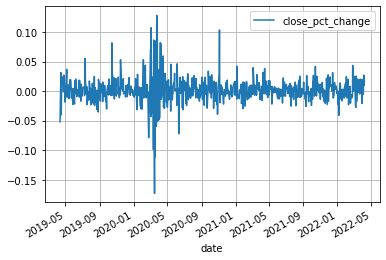

In [96]:
# the x axis looks nice if the index is set to date time
dfs[['close_pct_change']].plot(grid=True)
plt.show()

####1. Check for Autocorrelation

In [102]:
# Compute and print the autocorrelation of daily changes
daily_returns = dfs['close_pct_change']
autocorr_daily = daily_returns.autocorr()
print(f'Autocorrelation of daily close returns: {autocorr_daily}')

# Convert daily data to weekly
close_weekly = daily_returns.resample(rule='W').last()

# Compute and print the autocorrelation
autocorr_weekly = close_weekly.autocorr()
print(f'Autocorrelation of weekly close returns: {autocorr_weekly}')

Autocorrelation of daily close returns: -0.1670854255154891
Autocorrelation of weekly close returns: 0.0685869956975201


**Negative daily autocorrelation** indicates **mean reversion**.  
**Positive weekly autocorrelation** indicates **Momentum or Trend Following**

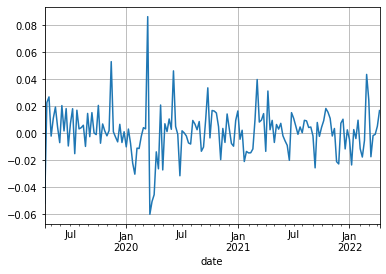

In [103]:
# Plot the weekly data to look for momentum
close_weekly.plot(grid=True)
plt.show()

In [115]:
print(type(daily_returns))
print(type(close_weekly))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


####2. Create Autocorrelation Plots

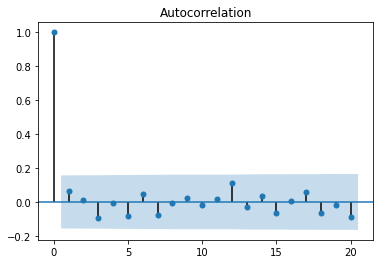

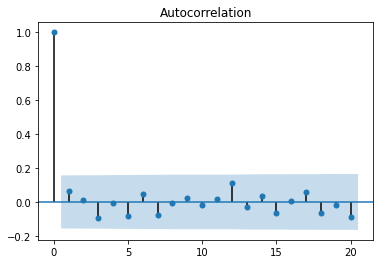

In [121]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(close_weekly, lags=20, alpha=0.05)

In [68]:
# Next, calculate acf values and build a loop construct to parse each ticker and store the acf values